# Machine Learning Project - Tyres' Failure Prediction

## Data set description

|Attribute | Type | Notes
| :---        |    :----:   |          ---: |
|vulc | Numerical | Vulcanization level|
|perc nat rubber | Numerical | % natural rubber|
|weather | Numerical | Weather condition index: 1: best, 0: worst|
|perc imp | Numerical | % impurities|
|temperature | Numerical | Temperature in °C|
|elevation | Numerical | Elevation in meters above sea level|
|perc exp comp | Numerical | % experimental compound|
|diameter | Numerical | Diameter in cm|
|tread type | Categorical| 
|tyre season | Categorical | 0: winter tyre, 1: summer tyre|
|month | Categorical | Month of testing|
|tread depth | Categorical| 
|wiring strength | Categorical|
|tyre quality | Categorical | 0: standard, 1: premium|
|add layers | Categorical | Number of additional inner layers|

### Data Snooping 

In [540]:
# Importing libraries required for preliminary analyses and importing dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df =  pd.read_csv("../data/train/tyres_model.csv")

In [541]:
# Data Snooping
print("\n\n",df.shape, "\n\n\n")
print(df.head(), "\n\n\n")
print(df.describe())
#Also used to see whether in categorical variables some outliers exist or not



 (3000, 16) 



     vulc  perc_nat_rubber  wiring_strength  weather  perc_imp  temperature  \
0  17.990               26                1     0.16      0.01        -8.12   
1  20.704               36                1     0.30      0.01        -4.52   
2  19.156               34                1     0.30      0.01        -1.08   
3  16.802               35                1     0.19      0.02         7.44   
4  17.140               23                2     0.39      0.01        30.52   

   tread_type  tyre_season  elevation  month  tread_depth  tyre_quality  \
0           0            1      332.5      8            0             1   
1           2            0      328.0     11            1             0   
2           0            0      247.0      0            1             0   
3           1            0      408.0      7            3             1   
4           0            1      308.0      2            2             0   

   perc_exp_comp  diameter  add_layers  failure  
0     

In [542]:
# Checking for duplicates

df[df.duplicated()]

# NO duplicated data are present

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure


In [543]:
# Checking for missing values

print(df.isna().any())

# Only diameter has nan values...How many?

df[df.isna().any(axis=1)] 

# 2110 missing entries for "diameter"
# What to do? Is Diameter important or not?


vulc               False
perc_nat_rubber    False
wiring_strength    False
weather            False
perc_imp           False
temperature        False
tread_type         False
tyre_season        False
elevation          False
month              False
tread_depth        False
tyre_quality       False
perc_exp_comp      False
diameter            True
add_layers         False
failure            False
dtype: bool


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
5,20.042,38,0,0.04,0.01,-0.20,2,1,160.5,0,0,0,5.96,NaN,1,0
6,21.172,33,1,0.39,0.01,-2.28,0,0,470.0,3,0,0,6.47,NaN,1,0
7,16.706,32,0,0.62,0.05,-3.96,3,1,148.5,7,2,0,5.39,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,17.860,21,1,0.16,0.01,-6.48,0,1,336.5,8,0,1,5.85,NaN,1,0
2994,19.298,29,1,0.03,0.00,-1.00,2,1,167.5,8,0,0,5.82,NaN,2,0
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1


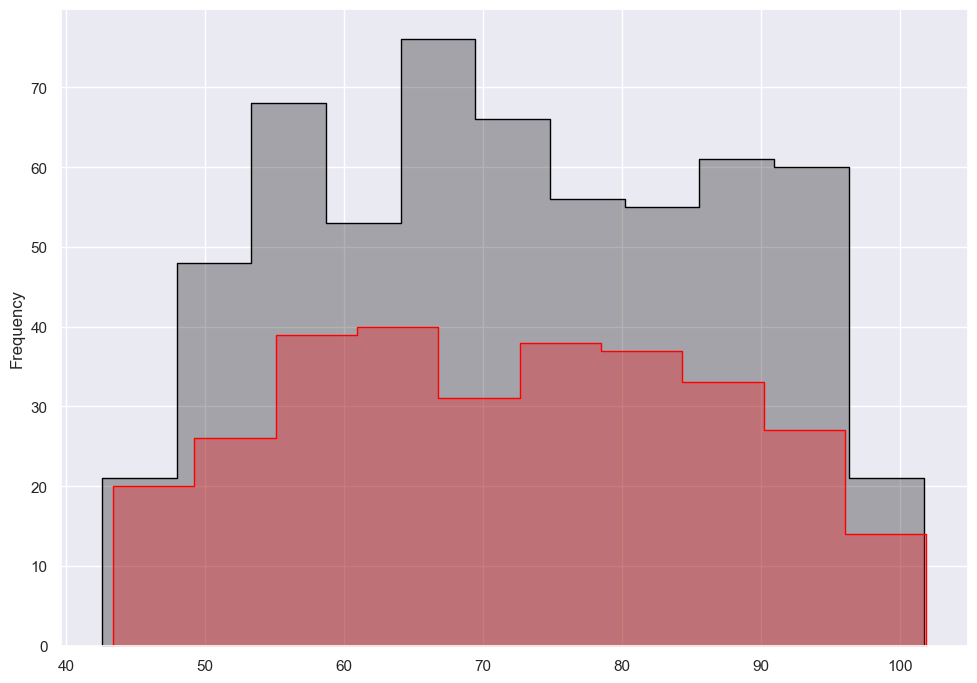

In [544]:
# What to do with the diameter column? Indeed, according to "tyres" theory it should be a relevant parameter for describing tyres' failure.
# Let's try to see simply whether its "predictive" power...


X_0 = df[df["failure"] == 0]
X_1 = df[df["failure"] == 1]

pic1 = sns.histplot(X_0["diameter"], color="black", element="step",alpha=0.3) #ALpha is a "transparency" variable
pic2 = sns.histplot(X_1["diameter"], color="red", element="step",alpha=0.3)

pic1.set(xlabel = None)
pic2.set(ylabel = "Frequency")

# plt.savefig("../figures/Diameter Relevance.png")
plt.show()


### Results:
#### We have decided to take two paths: 
#### First we keep the variable and understand if it is important within the "feature selection" section. If it does not seem to be so relevant, we will remove it completely from the dataset and work with all the 300 rows.


In [545]:
# Outliers Detection: Division between categorical and numerical 
# Dropped the diameter attribute

df = df.dropna(axis = 0)

df_categorical = df[["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers","failure"]]
df_numerical = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","diameter","failure"]]

print(df_numerical.shape)
print(df_categorical.shape)


(890, 9)
(890, 8)


<AxesSubplot:>

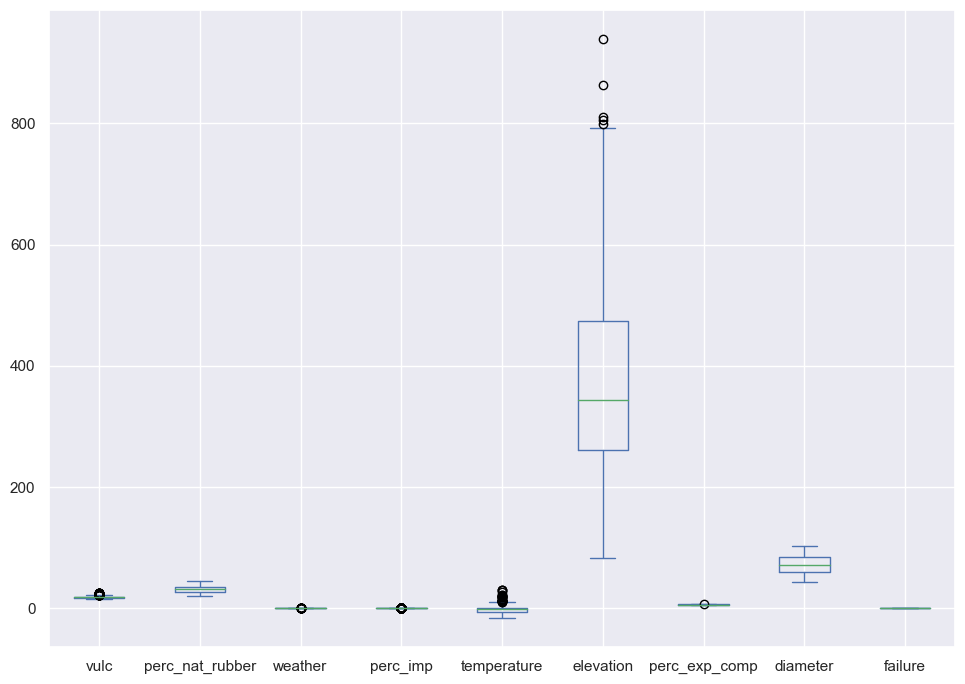

In [546]:
# Outliers' detection only on numeric variables 
df_numerical.plot.box()

array([[<AxesSubplot:title={'center':'vulc'}>,
        <AxesSubplot:title={'center':'perc_nat_rubber'}>,
        <AxesSubplot:title={'center':'weather'}>],
       [<AxesSubplot:title={'center':'perc_imp'}>,
        <AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:title={'center':'perc_exp_comp'}>,
        <AxesSubplot:title={'center':'diameter'}>,
        <AxesSubplot:title={'center':'failure'}>]], dtype=object)

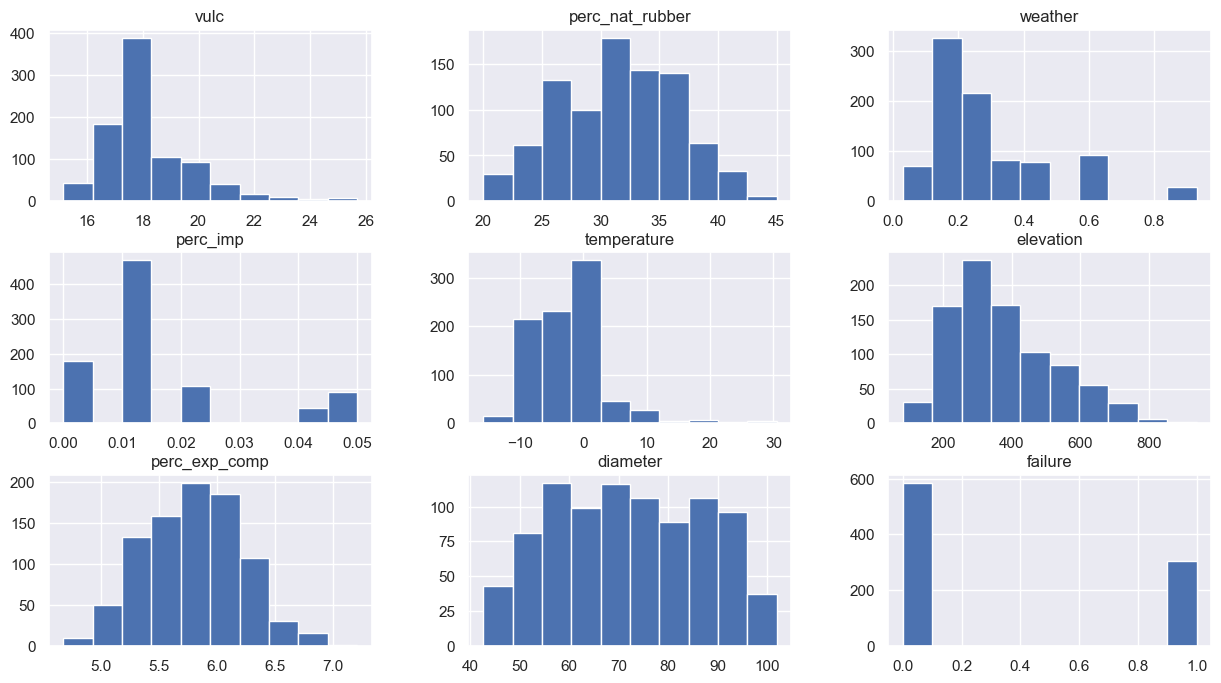

In [547]:
# Checking distribution

df[df_numerical.columns].hist(figsize=[15,8])


# Transforming "vulc" and "temperature" could be sensless. Anyways scaling them migth have sense in order to 
# bring them on similar scales

In [548]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
import pickle

scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))
columns = df_numerical[:-1].columns
scaler.fit(df_numerical.drop("failure",axis=1))
scaled_numerical = scaler.transform(df_numerical.drop('failure',axis=1))
scaled_numerical=pd.DataFrame(scaled_numerical, columns=df_numerical.columns[:-1])
pickle.dump(scaler, open("min_max_scaler_1.pkl", "wb"))

scaled_numerical.head()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,diameter
0,-0.461919,-0.52,-0.711111,-0.6,-0.669836,-0.415743,-0.644269,-0.581788
1,-0.688119,0.20,-0.644444,-0.2,0.002593,-0.239650,0.533597,-0.598651
2,-0.623762,-0.76,-0.200000,-0.6,1.000000,-0.472886,0.162055,0.136594
3,-0.533130,-0.60,-0.711111,-0.6,-0.616249,-0.949854,-0.494071,-0.291737
4,-0.474867,0.36,-0.400000,-0.6,-0.244598,-0.693294,0.090909,0.237774


In [549]:
import numpy as np

failure = df["failure"].reset_index()
df_numerical_scaled = scaled_numerical.join(failure)
df_numerical_scaled


,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,diameter,index,failure
0,-0.461919,-0.52,-0.711111,-0.6,-0.669836,-0.415743,-0.644269,-0.581788,0,0
1,-0.688119,0.20,-0.644444,-0.2,0.002593,-0.239650,0.533597,-0.598651,3,0
2,-0.623762,-0.76,-0.200000,-0.6,1.000000,-0.472886,0.162055,0.136594,4,0
3,-0.533130,-0.60,-0.711111,-0.6,-0.616249,-0.949854,-0.494071,-0.291737,8,0
4,-0.474867,0.36,-0.400000,-0.6,-0.244598,-0.693294,0.090909,0.237774,15,0
...,...,...,...,...,...,...,...,...,...,...
885,-0.624524,0.28,-0.200000,-0.6,-0.324114,-0.581341,0.288538,0.018550,2988,0
886,-0.582254,-0.28,-0.200000,-0.6,-0.535004,0.019242,0.043478,-0.332209,2989,1
887,-0.646992,0.20,0.311111,1.0,-0.341400,-0.030904,-0.059289,-0.133221,2992,1
888,-0.293983,0.36,-1.000000,-1.0,-0.351772,-0.514869,-0.043478,-0.403035,2998,0


In [550]:
df_categorical = df_categorical.reset_index()
df_categorical = df_categorical.drop("failure",axis=1)
df_scaled = pd.merge(df_categorical, df_numerical_scaled)

failure
0    585
1    305
dtype: int64


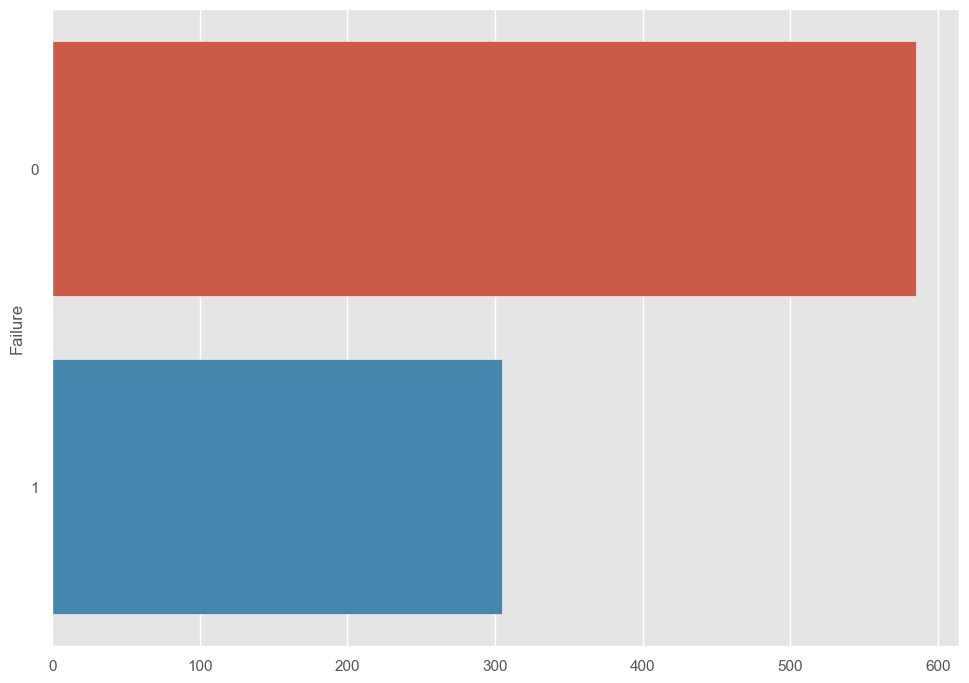

In [551]:
# Is the dataset Balanced or Unbalanced? 

print(df_scaled.groupby('failure').size()) #"target" is the name of the target column, change it accordingly to your dataset
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df_scaled.failure ,data=df) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("")
plt.ylabel("Failure")

#plt.savefig("../figures/Imbalanced Data-set.png")
plt.show()
# Unbalanced dataset with ratio 2:1. Shall we try with over- or under-sampling?

(610, 17)


Text(0, 0.5, 'Failure')

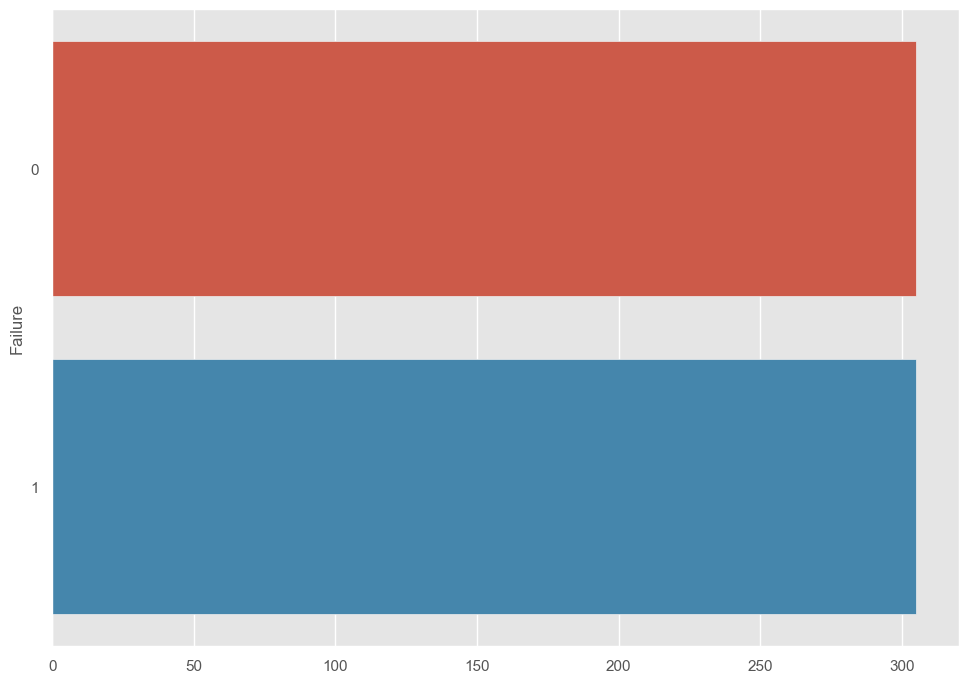

In [552]:
# We are going to downsample the majority class
from sklearn.utils import resample


df_majority = df_scaled[df_scaled["failure"]==0]
df_minority = df_scaled[df_scaled["failure"]==1]

df_majority_downsample = resample(df_majority, replace=False,n_samples= len(df_minority), random_state=69)
df = pd.concat([df_majority_downsample,df_minority])
print(df.shape)

sns.countplot(y=df.failure ,data=df) # Checking the distribution is 50/50
plt.xlabel("")
plt.ylabel("Failure")

## Feature selection

This decision will be made according to how the explanatory variables behave with respect to the dependent one.


In [553]:
# Recalling the dataset so far
df

,index,tread_type,tyre_season,month,tread_depth,wiring_strength,tyre_quality,add_layers,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,diameter,failure
787,2683,1,0,3,3,1,1,1,0.081874,-0.04,-0.711111,-0.6,-0.754538,-0.449563,-0.264822,0.655987,0
809,2767,1,0,5,1,1,0,1,-0.050647,-0.12,-0.400000,-0.6,-0.396716,-0.395918,-0.509881,0.096121,0
27,99,3,1,1,2,1,0,1,-0.406321,-0.60,-0.955556,-1.0,-0.393258,0.471720,-0.035573,-0.443508,0
331,1161,0,1,1,1,0,0,0,-0.507235,-0.12,-0.577778,-1.0,-0.372515,-0.496210,0.003953,0.204047,0
551,1887,1,0,5,0,0,0,0,-0.452018,0.44,-0.400000,-0.6,-0.318928,-0.039067,0.027668,-0.868465,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,2971,1,1,1,3,1,1,2,0.136710,0.12,-0.711111,-0.6,-0.859983,-0.456560,-0.280632,-0.069140,1
880,2972,4,0,10,0,0,0,1,-0.354151,0.28,-0.400000,-0.6,-0.289542,0.239650,0.264822,-0.146712,1
884,2986,3,0,6,2,1,0,1,0.500381,0.12,1.000000,0.6,-0.350043,0.147522,-0.003953,0.602024,1
886,2989,2,1,11,0,1,0,1,-0.582254,-0.28,-0.200000,-0.6,-0.535004,0.019242,0.043478,-0.332209,1


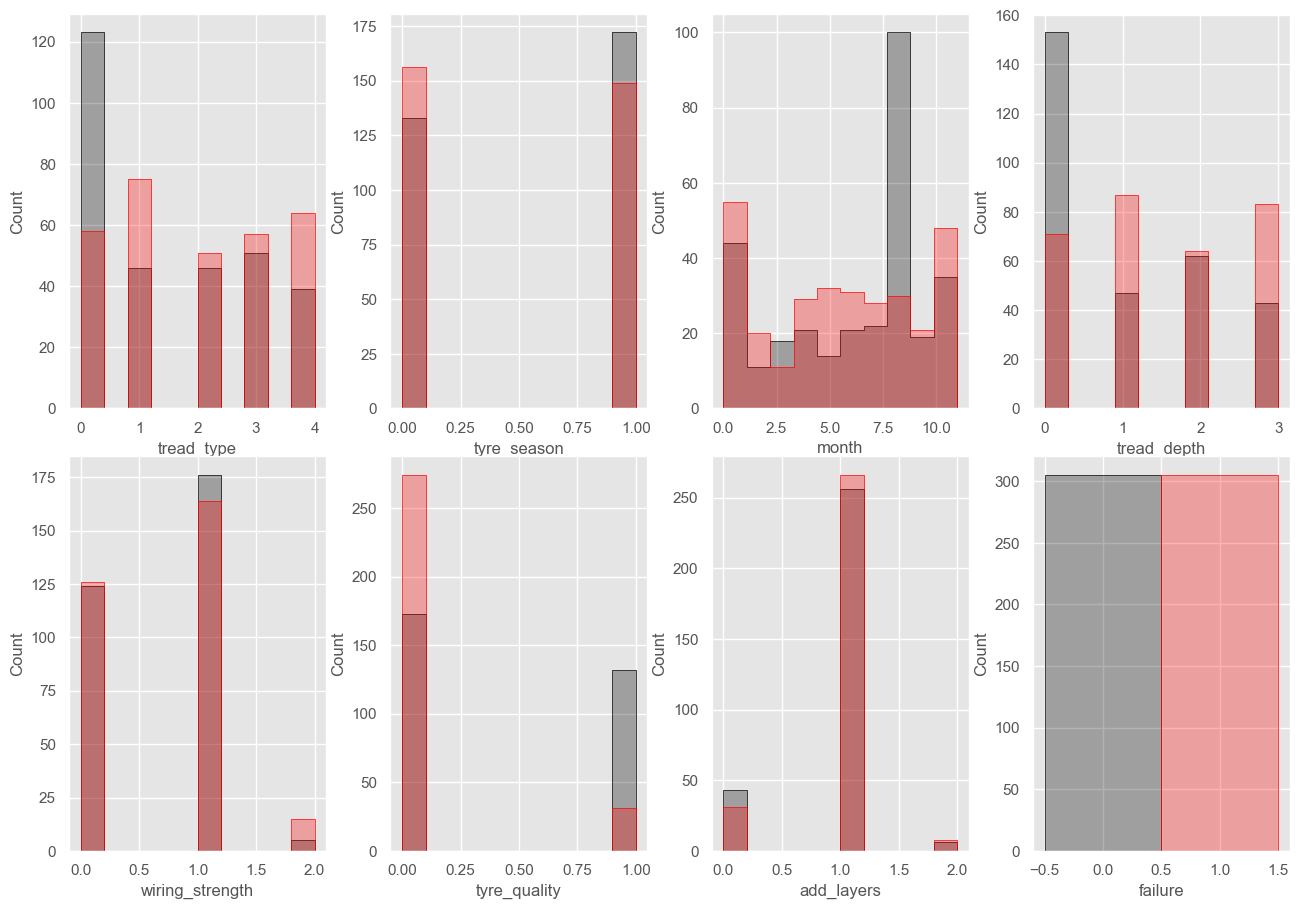

In [554]:
import seaborn as sns
import matplotlib.pyplot as plt


df_categorical = df[["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers","failure"]]
df_numerical = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","diameter","failure"]]


X_0_c = df_categorical[df_categorical["failure"] == 0]
X_1_c = df_categorical[df_categorical["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(13,9))
fig.tight_layout()


for i, ax in zip(range(df_categorical.columns.size), axes.flat):
    sns.histplot(X_0_c.iloc[:,i], color="black", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1_c.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

# Maybe temperature, weather 

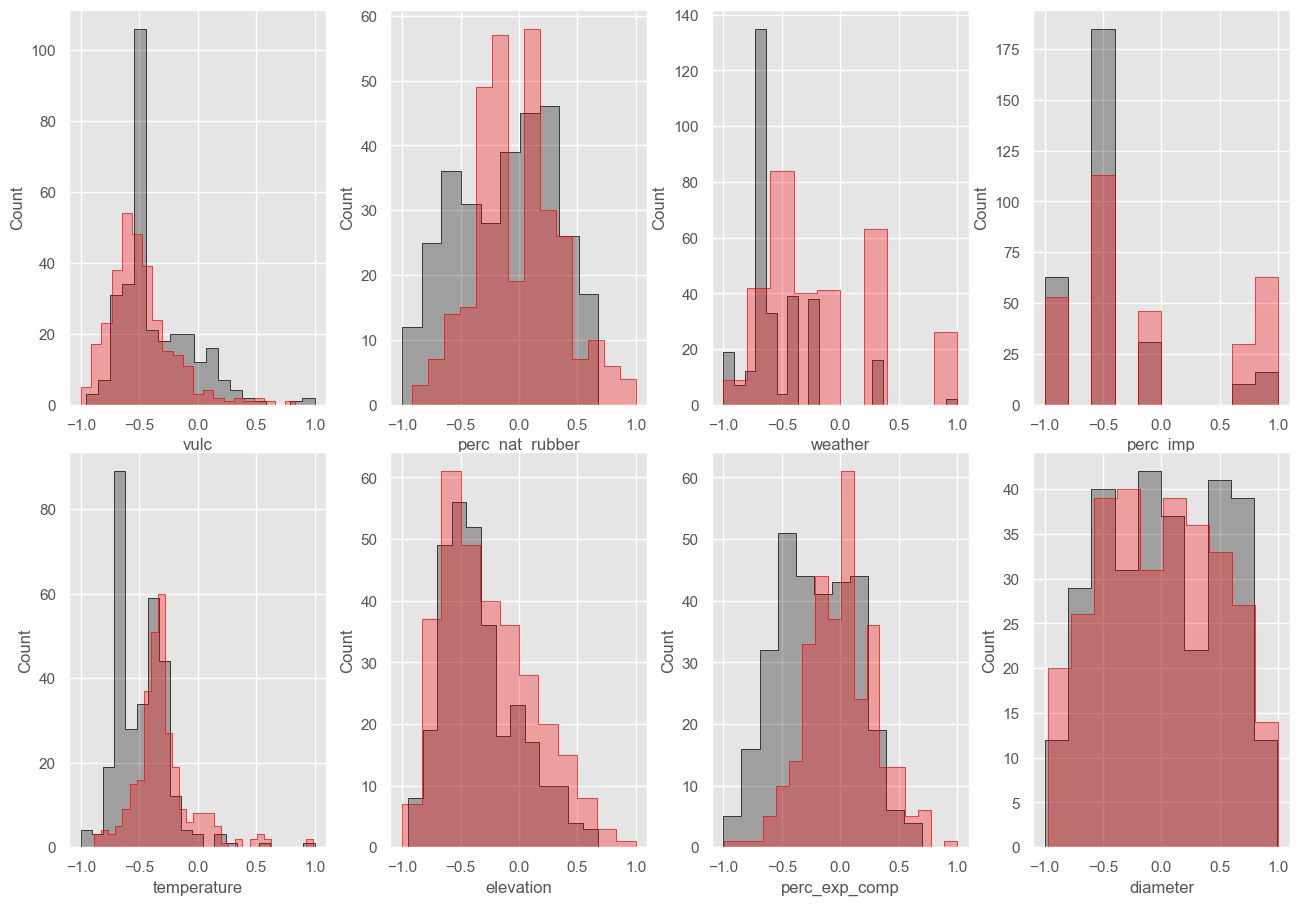

In [555]:
X_0_n = df_numerical[df_numerical["failure"] == 0]
X_1_n = df_numerical[df_numerical["failure"] == 1]

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(13,9))
fig.tight_layout()


for i, ax in zip(range(df_numerical.columns.size), axes.flat):
    sns.histplot(X_0_n.iloc[:,i], color="black", element="step", ax=ax,  alpha=0.3)#ALpha is a "transparency" variable
    sns.histplot(X_1_n.iloc[:,i], color="red", element="step", ax=ax,  alpha=0.3)
plt.show()

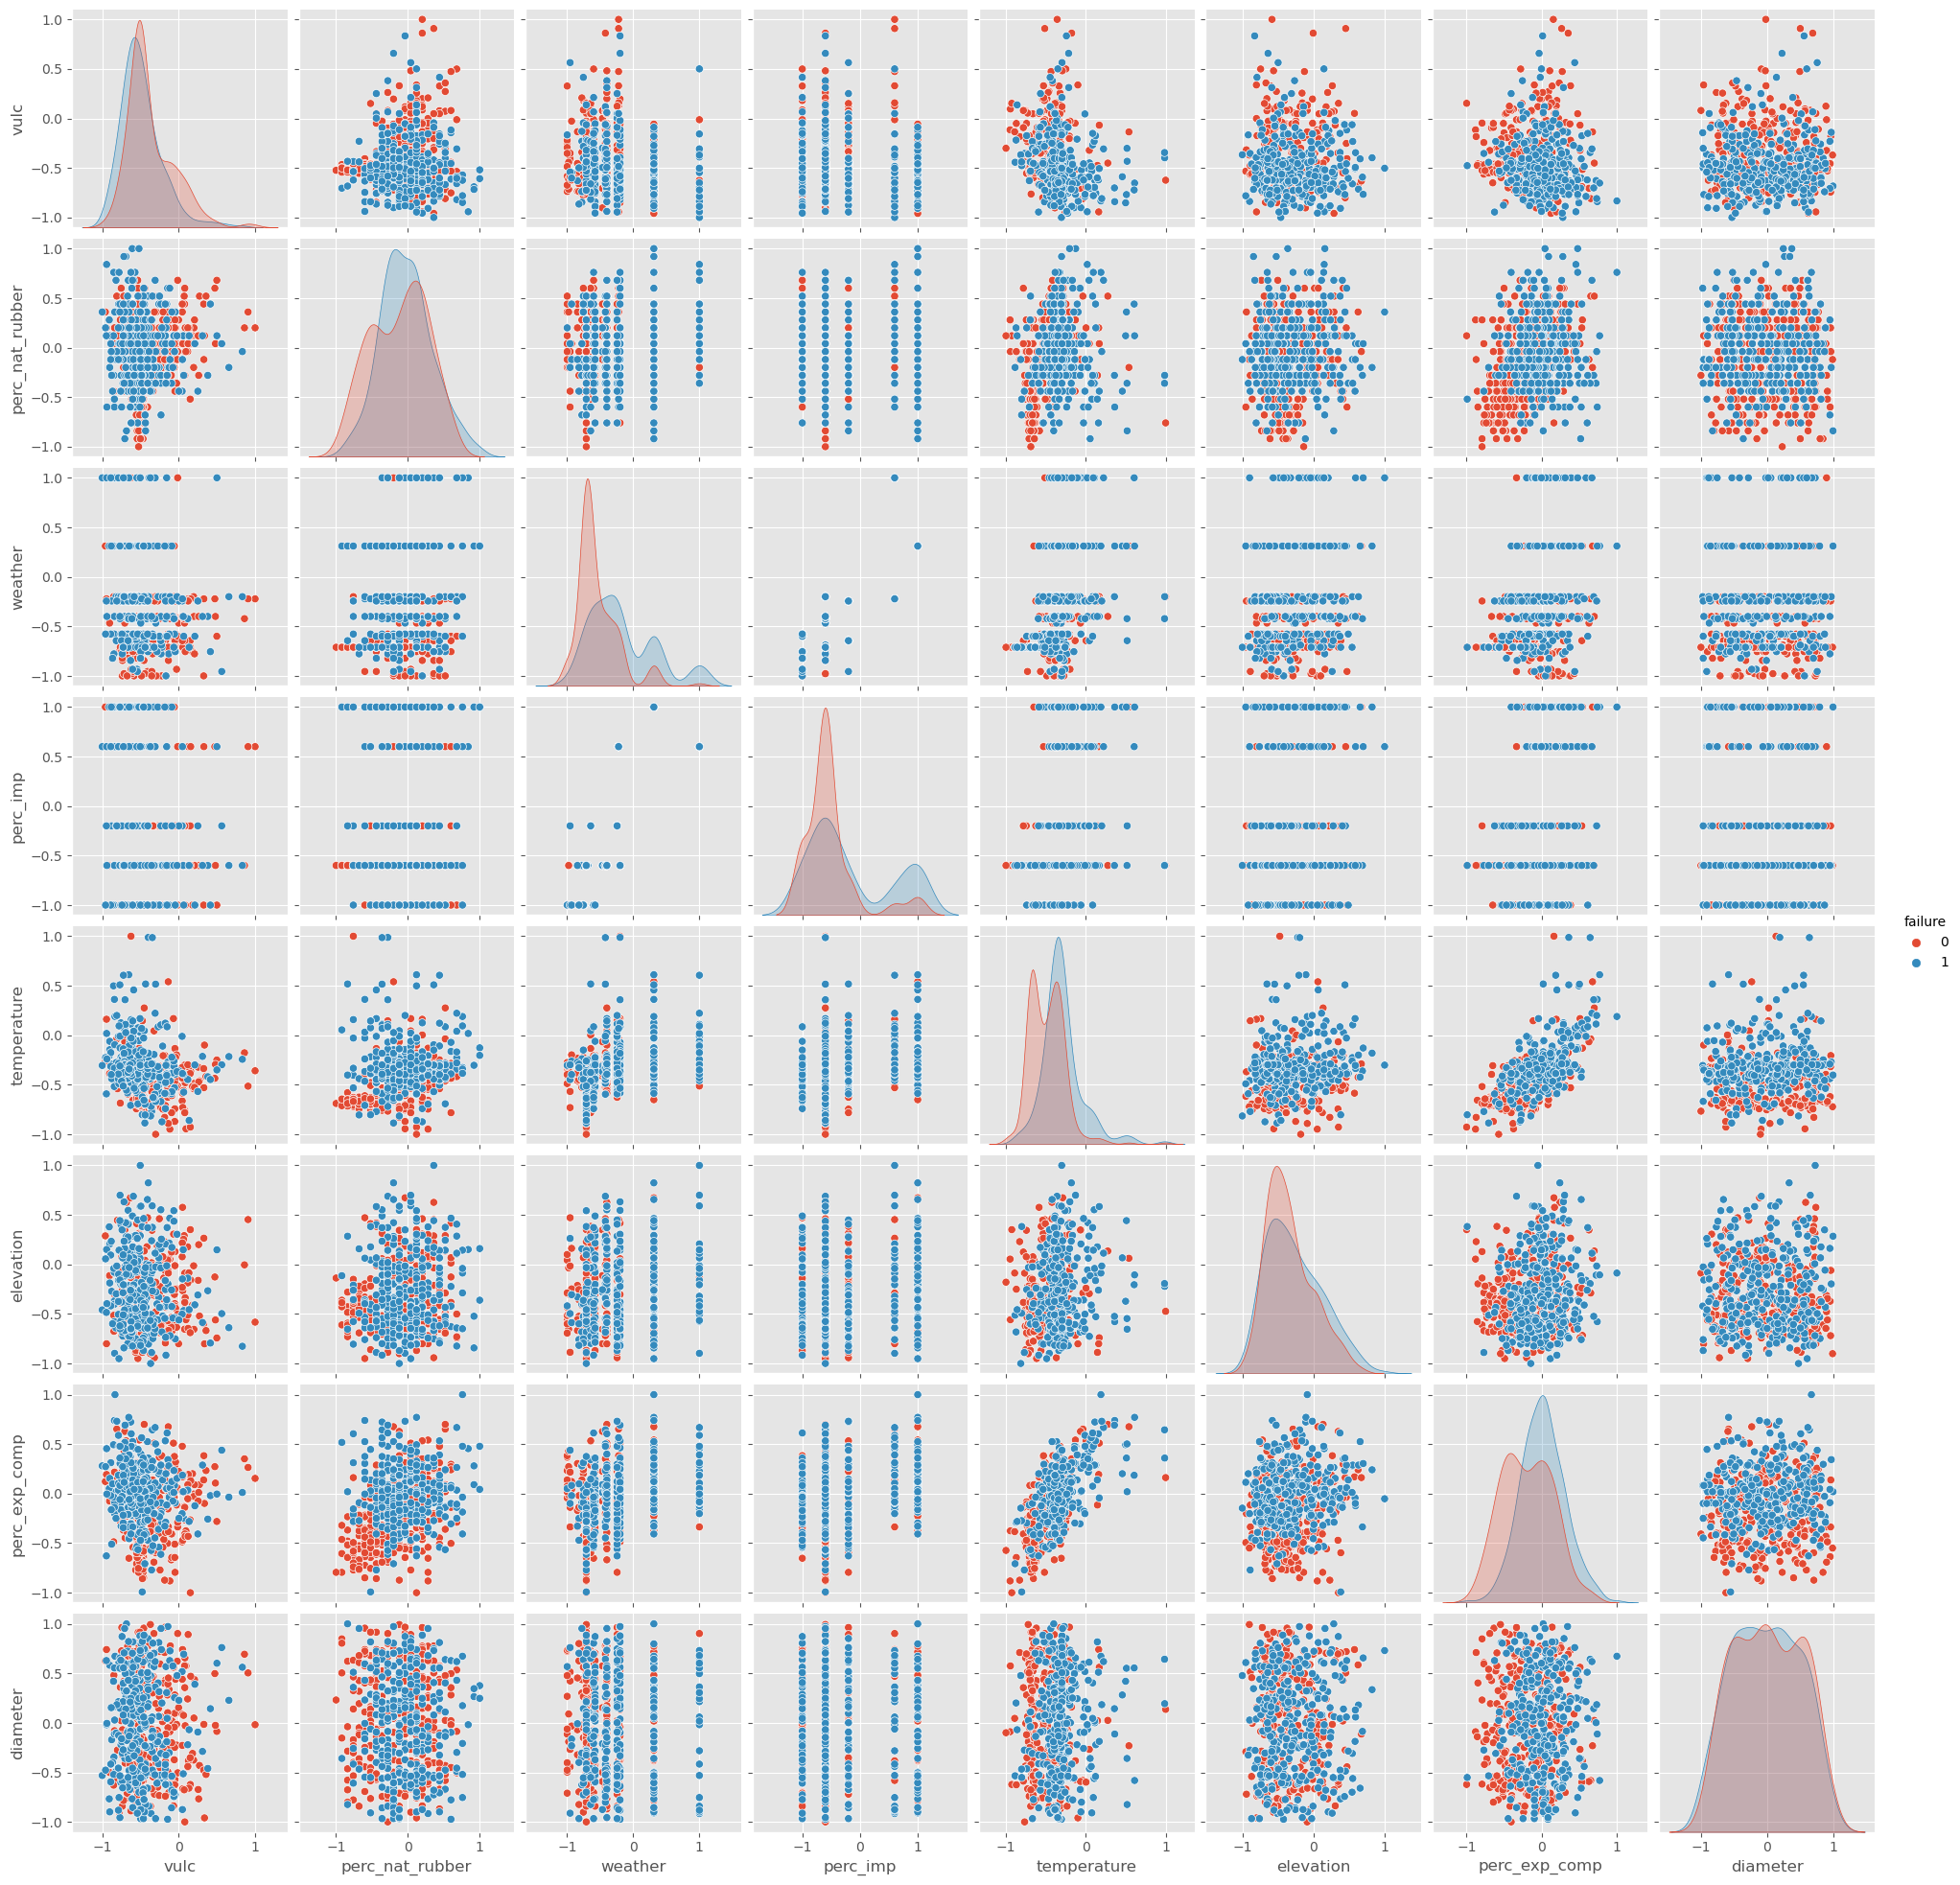

In [403]:
sns.pairplot(df_numerical, hue='failure')

<AxesSubplot:>

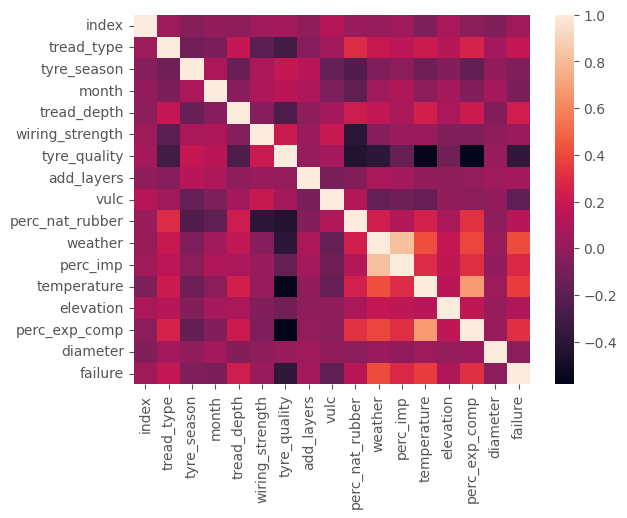

In [406]:
sns.heatmap(df.corr())

In [556]:
# Using Embedded Models: Random Forest

#Reloading the data to recoup the data removed for the analyses

from sklearn.model_selection import train_test_split #Required since it is best to select according to the training data to prevent overfitting lately

X = df.iloc[:,:-1]
y = df.iloc[:,-1] #[-1]]

#print(y.head()) #Check
#print(X.head())

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    random_state= 69
                                                   ) #fix random seed for replicability

#print(X_train, X_test)

from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [20, 50, 100, 200], 
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [3,4,5], 
             'min_samples_split' : [4,5,10],
              'min_samples_leaf' : [4,5,10]
             }

gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=10, n_jobs=-1, refit=True) 

gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
***GRIDSEARCH RESULTS***
Best score: 0.778732 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
0.746506 (0.030478) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 20}
0.745511 (0.040837) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.752031 (0.048208) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.747670 (0.046736) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.751637 (0.034329) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
0.750909 (0.030047) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_s

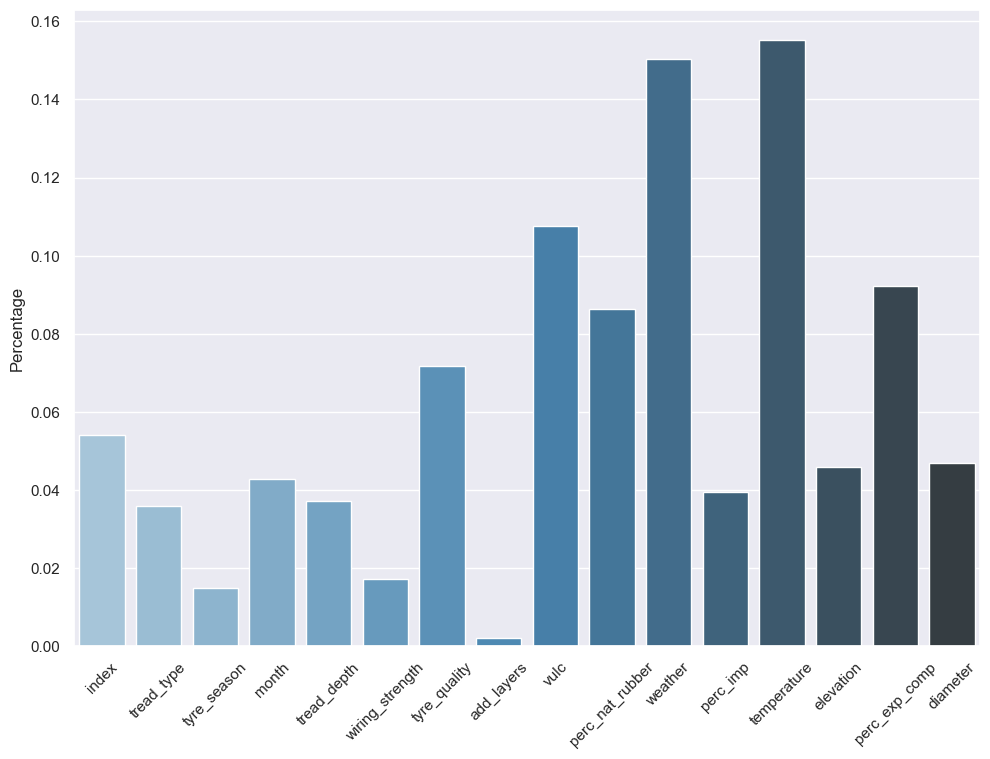

In [564]:
import numpy as np

features = []
for i in range(100): 
    rand_forest = RandomForestClassifier(n_estimators = 20, criterion = "entropy", max_depth = 5, min_samples_split = 4, min_samples_leaf=4)
    rand_forest.fit(X_train,y_train)
    features.append(rand_forest.feature_importances_)

features = pd.DataFrame(features)
variables = pd.DataFrame(features.mean())

sns.set(rc={'figure.figsize':(11.7,8.27)})
pic = sns.barplot(x=X_train.columns, y=variables[0], palette="Blues_d") #This tells us which variables might be the most interesting
plt.xticks(rotation=45)
pic.set(ylabel = "Percentage")
#plt.savefig("../figures/Diameter Relevance through Random Forest.png")

#### Since it seems that the diameter is not as relevant as we were expecting (given the data snooping processes and embedded methods) we opt to drop it and work with the entire dataset but with the diameter

In [737]:
# All the processes done before summarized in few rapid cells for convenience

from sklearn.preprocessing import MinMaxScaler
import pickle

df =  pd.read_csv("../data/train/tyres_model.csv")
df = df.dropna(axis = 1) #Dropping diameter

df_categorical = df[["tread_type", "tyre_season", "month", "tread_depth", "wiring_strength", "tyre_quality", "add_layers","failure"]]
df_numerical = df[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","failure"]]

df.shape

(3000, 15)

In [738]:
#Scaling the data

scaler =  MinMaxScaler(copy=False,feature_range=(-1, 1))
columns = df_numerical[:-1].columns
scaler.fit(df_numerical.drop("failure",axis=1))
scaled_numerical = scaler.transform(df_numerical.drop('failure',axis=1))
scaled_numerical = pd.DataFrame(scaled_numerical, columns=df_numerical.columns[:-1])
pickle.dump(scaler, open("min_max_scaler_1.pkl", "wb"))

print(scaled_numerical.head())
scaled_numerical.shape

       vulc  perc_nat_rubber   weather  perc_imp  temperature  elevation  \
0 -0.355505        -0.428571 -0.711111      -0.6    -0.603412  -0.351893   
1 -0.047446         0.285714 -0.400000      -0.6    -0.475480  -0.361915   
2 -0.223156         0.142857 -0.400000      -0.6    -0.353234  -0.542316   
3 -0.490352         0.214286 -0.644444      -0.2    -0.050462  -0.183742   
4 -0.451986        -0.642857 -0.200000      -0.6     0.769723  -0.406459   

   perc_exp_comp  
0      -0.558052  
1       0.205993  
2       0.363296  
3       0.558052  
4       0.205993  


(3000, 7)

In [739]:
df_scaled = pd.concat([df_categorical, scaled_numerical], axis = 1)
print(df_scaled)

      tread_type  tyre_season  month  tread_depth  wiring_strength  \
0              0            1      8            0                1   
1              2            0     11            1                1   
2              0            0      0            1                1   
3              1            0      7            3                1   
4              0            1      2            2                2   
...          ...          ...    ...          ...              ...   
2995           1            1     10            1                2   
2996           1            1      6            1                1   
2997           1            0      8            3                1   
2998           4            0     11            0                0   
2999           1            0      2            1                2   

      tyre_quality  add_layers  failure      vulc  perc_nat_rubber   weather  \
0                1           1        0 -0.355505        -0.428571 -0.711111   

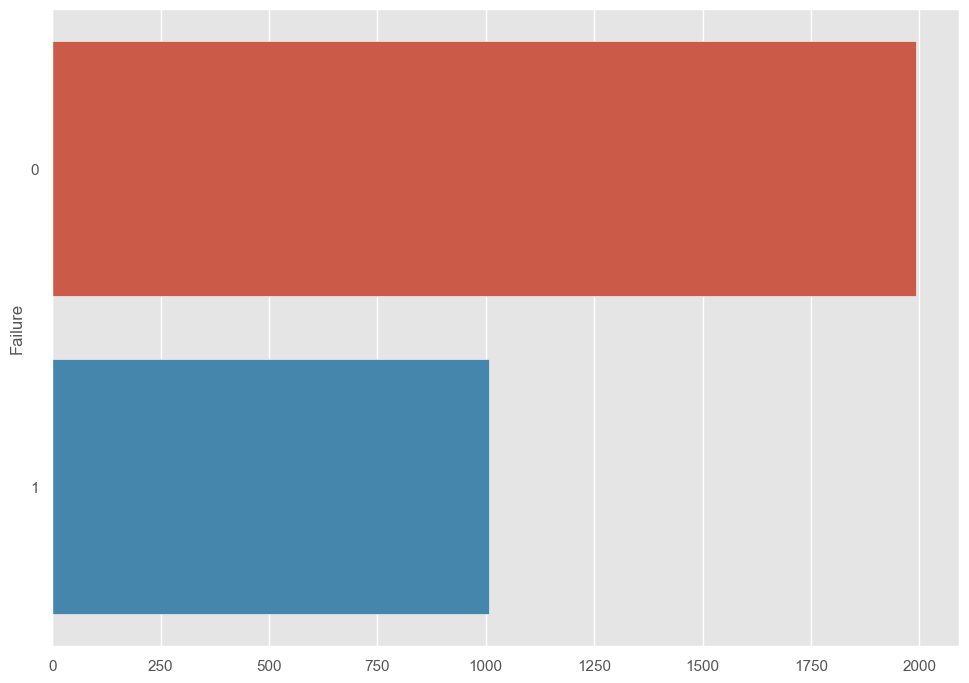

(2016, 15)


Text(0, 0.5, 'Failure')

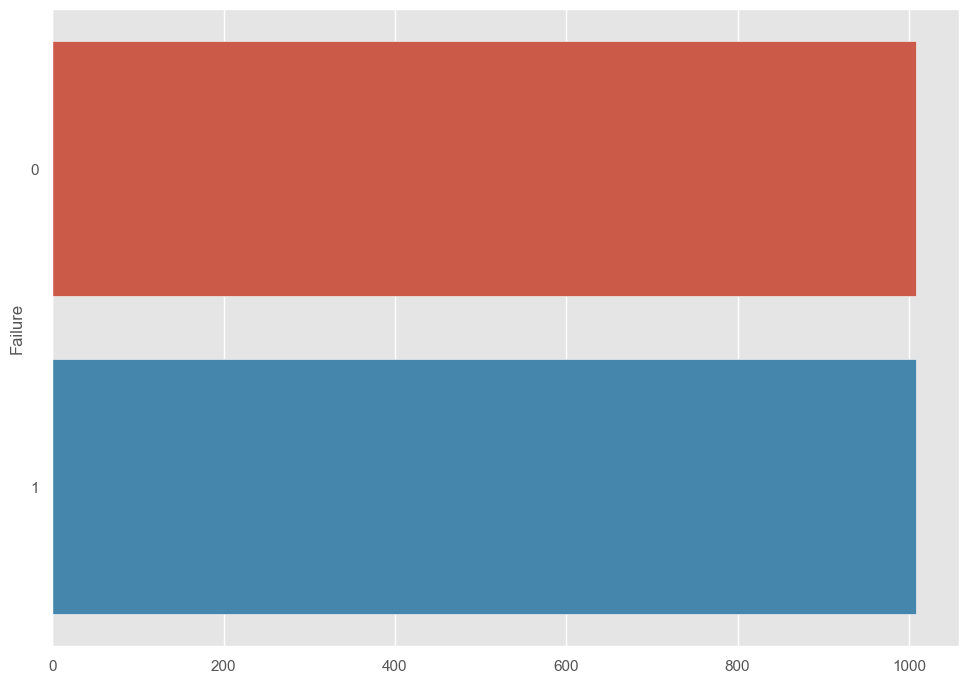

In [740]:
# Is the dataset Balanced or Unbalanced? 

df_scaled.groupby('failure').size()
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df_scaled.failure ,data=df)
plt.xlabel("")
plt.ylabel("Failure")

#plt.savefig("../figures/Imbalanced Data-set.png")
plt.show() #Imbalanced 

# We are going to downsample the majority class
from sklearn.utils import resample

df_majority = df_scaled[df_scaled["failure"]==0]
df_minority = df_scaled[df_scaled["failure"]==1]

df_majority_downsample = resample(df_majority, replace=False,n_samples= len(df_minority), random_state=69)
df = pd.concat([df_majority_downsample,df_minority])
#df = df.drop("index", axis = 1)

print(df.shape)

sns.countplot(y=df.failure ,data=df) # Checking the distribution is 50/50
plt.xlabel("")
plt.ylabel("Failure")



In [719]:
# Applying Random Forest in this case as well 
from sklearn.model_selection import train_test_split #Required since it is best to select according to the training data to prevent overfitting lately

X = df.loc[:,df.columns != "failure"]
y = df["failure"]

print(y.head()) #Check
print(X.head())


#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    random_state= 69
                                                   ) #fix random seed for replicability

#print(X_train, X_test)

from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [20, 50, 100, 200], 
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [3,4,5], 
             'min_samples_split' : [4,5,10],
              'min_samples_leaf' : [4,5,10]
             }

gs = GridSearchCV(classifier, parameters, cv=5, scoring = 'f1', verbose=10, n_jobs=-1, refit=True) 

gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

228     0
6       0
2017    0
880     0
1767    0
Name: failure, dtype: int64
      tread_type  tyre_season  month  tread_depth  wiring_strength  \
228            0            1      8            0                1   
6              0            0      3            0                1   
2017           0            0      6            1                1   
880            0            0     11            3                0   
1767           4            0      3            1                0   

      tyre_quality  add_layers      vulc  perc_nat_rubber   weather  perc_imp  \
228              1           1 -0.387287        -0.428571 -0.711111      -0.6   
6                0           1  0.005675         0.071429 -0.200000      -0.6   
2017             0           1 -0.388876         0.500000 -0.400000      -0.6   
880              0           1 -0.260613         0.142857 -0.400000      -0.6   
1767             0           1 -0.398411         0.500000 -1.000000      -1.0   

      temperat

[Text(0, 0.5, 'Percentage')]

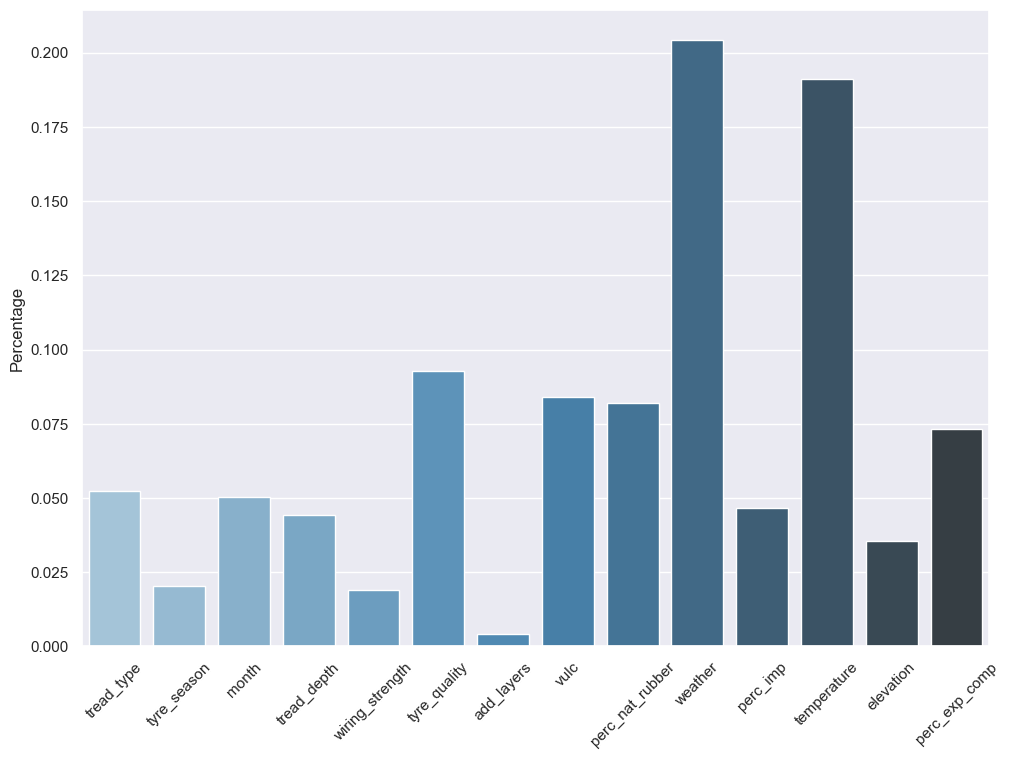

In [720]:
import numpy as np

features = []
for i in range(100): 
    rand_forest = RandomForestClassifier(n_estimators = 20, criterion = "entropy", max_depth = 5, min_samples_split = 4, min_samples_leaf=4)
    rand_forest.fit(X_train,y_train)
    features.append(rand_forest.feature_importances_)

features = pd.DataFrame(features)
variables = pd.DataFrame(features.mean())

sns.set(rc={'figure.figsize':(11.7,8.27)})
pic = sns.barplot(x=X_train.columns, y=variables[0], palette="Blues_d") #This tells us which variables might be the most interesting
plt.xticks(rotation=45)
pic.set(ylabel = "Percentage")
#plt.savefig("../figures/Diameter Relevance through Random Forest.png")


<AxesSubplot:>

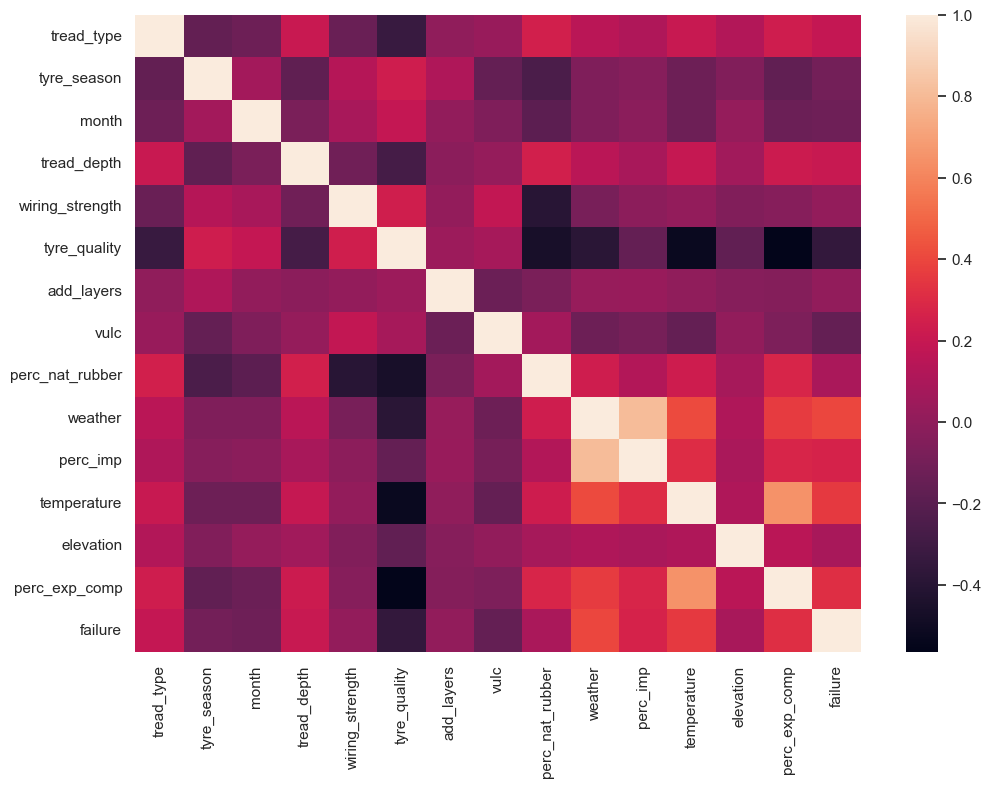

In [590]:
sns.heatmap(df.corr())

#### Given the results obtained above, we will opt for the following variables: 

In [741]:
import numpy as np

#df_categorical = df_categorical.drop("failure", axis = 1)
df_categorical = df.loc[:,["tyre_quality", "month", "tread_type"]] #According to what we have seen above
df_categorical = df_categorical.astype("category")
dummies = pd.get_dummies(df_categorical)
dummies.tail()

df_numerical = df[["vulc", "perc_nat_rubber", "weather", "temperature", "perc_exp_comp", "failure"]]
df = pd.concat([dummies,df_numerical], axis =1) 
df.head()

#Trial in variable selection

#for column in df.columns:
 #   if df[column].dtype == 'uint8':
  #      df[column] = df[column].astype(np.int32)

df.info(verbose=True)

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 228 to 2996
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tyre_quality_0   2016 non-null   uint8  
 1   tyre_quality_1   2016 non-null   uint8  
 2   month_0          2016 non-null   uint8  
 3   month_1          2016 non-null   uint8  
 4   month_2          2016 non-null   uint8  
 5   month_3          2016 non-null   uint8  
 6   month_4          2016 non-null   uint8  
 7   month_5          2016 non-null   uint8  
 8   month_6          2016 non-null   uint8  
 9   month_7          2016 non-null   uint8  
 10  month_8          2016 non-null   uint8  
 11  month_9          2016 non-null   uint8  
 12  month_10         2016 non-null   uint8  
 13  month_11         2016 non-null   uint8  
 14  tread_type_0     2016 non-null   uint8  
 15  tread_type_1     2016 non-null   uint8  
 16  tread_type_2     2016 non-null   uint8  
 17  tread_type_3

,tyre_quality_0,tyre_quality_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,...,tread_type_1,tread_type_2,tread_type_3,tread_type_4,vulc,perc_nat_rubber,weather,temperature,perc_exp_comp,failure
228,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.387287,-0.428571,-0.711111,-0.563611,-0.490637,0
6,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0.005675,0.071429,-0.200000,-0.395878,0.445693,0
2017,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,-0.388876,0.500000,-0.400000,-0.151386,0.101124,0
880,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.260613,0.142857,-0.400000,-0.377399,-0.205993,0
1767,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,-0.398411,0.500000,-1.000000,-0.378820,0.191011,0


## Splitting data

In [742]:
#Separate X and y (explanatory variables and target variable)

X = df.iloc[:,df.columns != "failure"]
y = df["failure"]
#X.head()
print(y.head()) #Check
print(X.head())


228     0
6       0
2017    0
880     0
1767    0
Name: failure, dtype: int64
      tyre_quality_0  tyre_quality_1  month_0  month_1  month_2  month_3  \
228                0               1        0        0        0        0   
6                  1               0        0        0        0        1   
2017               1               0        0        0        0        0   
880                1               0        0        0        0        0   
1767               1               0        0        0        0        1   

      month_4  month_5  month_6  month_7  ...  tread_type_0  tread_type_1  \
228         0        0        0        0  ...             1             0   
6           0        0        0        0  ...             1             0   
2017        0        0        1        0  ...             1             0   
880         0        0        0        0  ...             1             0   
1767        0        0        0        0  ...             0             0   

  

      tyre_quality_0  tyre_quality_1  month_0  month_1  month_2  month_3  \
415                1               0        0        0        0        0   
1209               1               0        0        0        0        0   
2640               1               0        0        1        0        0   
184                1               0        0        0        0        0   
1421               1               0        0        0        0        0   
...              ...             ...      ...      ...      ...      ...   
1821               0               1        0        0        0        0   
1047               1               0        0        0        0        0   
2933               1               0        0        1        0        0   
630                1               0        0        1        0        0   
186                1               0        0        1        0        0   

      month_4  month_5  month_6  month_7  ...  tread_type_0  tread_type_1  \
415       

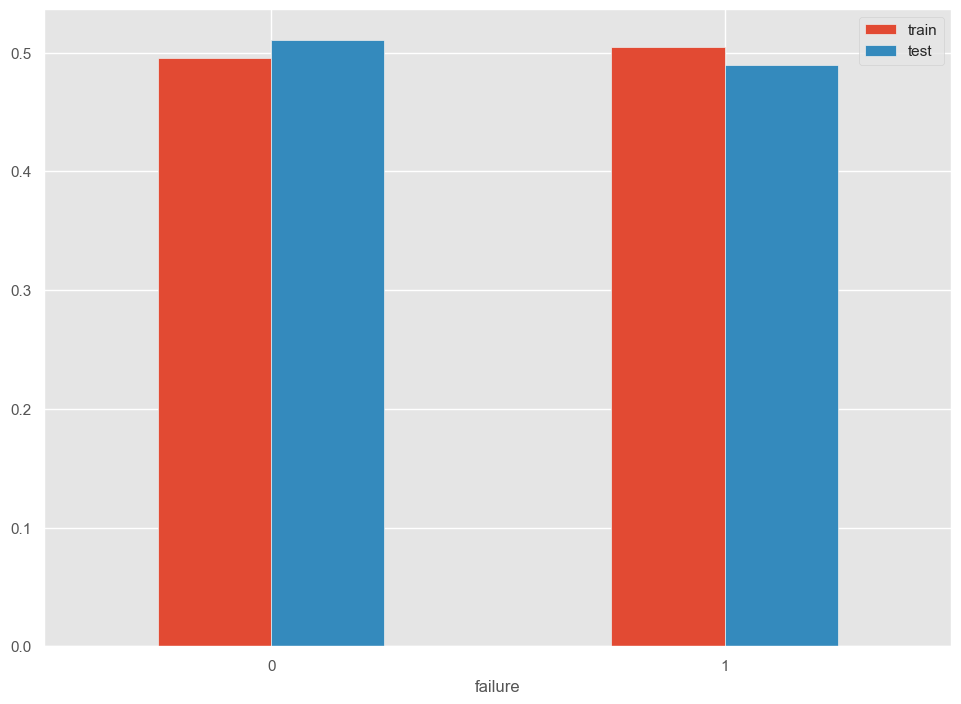

In [743]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.3, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    random_state= 69
                                                   ) #fix random seed for replicability

print(X_train, X_test)


y_train_dist=y_train.groupby(y_train.iloc[:]).size()/y_train.size
y_test_dist=y_test.groupby(y_test.iloc[:]).size()/y_test.size

train_test_dist = pd.DataFrame({'train': y_train_dist, 'test': y_test_dist})
ax = train_test_dist.plot.bar(rot=0) # rotation of the labels


## KNN - Classifier

In [749]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(1,100), 'weights':['distance']}

gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'f1', verbose=4, n_jobs=-1)
gs = gs.fit(X_train, y_train)

Fitting 10 folds for each of 99 candidates, totalling 990 fits


In [750]:
#summarize the results of your GRIDSEARCH
print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("Mean %f Std (%f) with: %r" % (mean, stdev, param))

Best score: 0.741278 using {'n_neighbors': 72, 'weights': 'distance'}
Mean 0.628724 Std (0.032567) with: {'n_neighbors': 1, 'weights': 'distance'}
Mean 0.628724 Std (0.032567) with: {'n_neighbors': 2, 'weights': 'distance'}
Mean 0.652218 Std (0.024597) with: {'n_neighbors': 3, 'weights': 'distance'}
Mean 0.639070 Std (0.026870) with: {'n_neighbors': 4, 'weights': 'distance'}
Mean 0.666328 Std (0.043964) with: {'n_neighbors': 5, 'weights': 'distance'}
Mean 0.665574 Std (0.033198) with: {'n_neighbors': 6, 'weights': 'distance'}
Mean 0.678983 Std (0.050357) with: {'n_neighbors': 7, 'weights': 'distance'}
Mean 0.683691 Std (0.044013) with: {'n_neighbors': 8, 'weights': 'distance'}
Mean 0.672959 Std (0.048709) with: {'n_neighbors': 9, 'weights': 'distance'}
Mean 0.686436 Std (0.048744) with: {'n_neighbors': 10, 'weights': 'distance'}
Mean 0.682493 Std (0.042596) with: {'n_neighbors': 11, 'weights': 'distance'}
Mean 0.679778 Std (0.043211) with: {'n_neighbors': 12, 'weights': 'distance'}
Mea

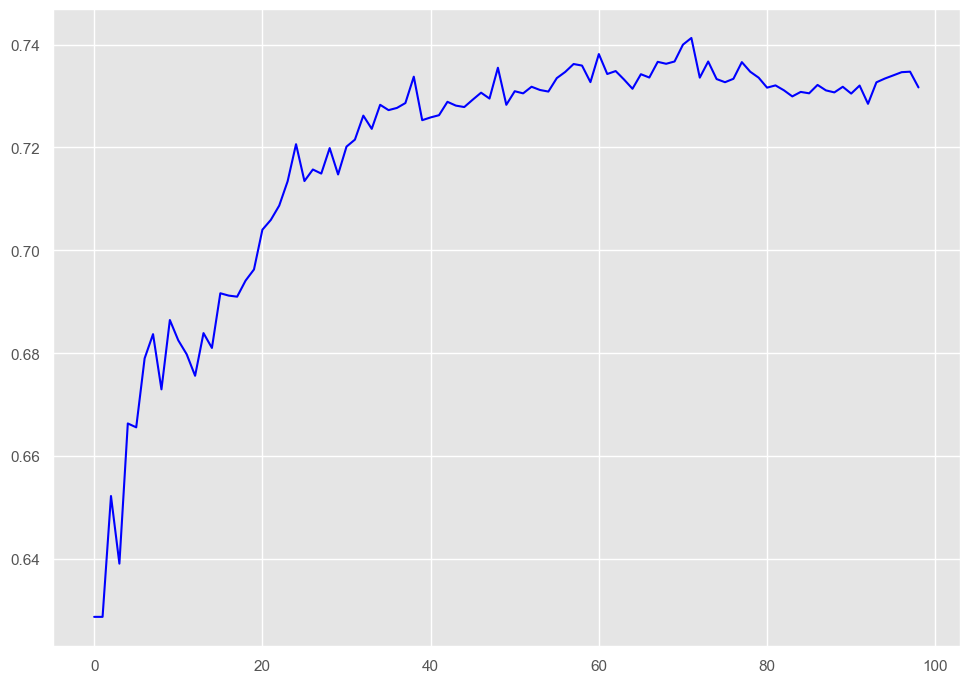

0.7412780321050213


In [751]:
import matplotlib.pyplot as plt
plt.plot (means, color='blue', alpha=1.00)
plt.show()
print(gs.best_score_)

In [752]:
#TEST ON YOUR TEST SET

best_model = gs.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred = best_model.predict(X_test)

In [753]:
from sklearn import metrics
#EVALUATE YOUR PREDICTION IN THE TRAINING SET
y_pred_train = best_model.predict(X_train)
print('***RESULTS ON TRAIN SET***')
print("precision: ", metrics.precision_score(y_train, y_pred_train)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_train, y_pred_train)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_train, y_pred_train)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_train, y_pred_train)) # (tp+tn)/m

***RESULTS ON TRAIN SET***
precision:  1.0
recall:  1.0
f1_score:  1.0
accuracy:  1.0


In [754]:
print('***RESULTS ON TEST SET***')
print("precision: ", metrics.precision_score(y_test, y_pred)) # tp / (tp + fp)
print("recall: ", metrics.recall_score(y_test, y_pred)) # tp / (tp + fn)
print("f1_score: ", metrics.f1_score(y_test, y_pred)) #F1 = 2 * (precision * recall) / (precision + recall)
print("accuracy: ", metrics.accuracy_score(y_test, y_pred)) # (tp+tn)/m

***RESULTS ON TEST SET***
precision:  0.6361111111111111
recall:  0.7736486486486487
f1_score:  0.698170731707317
accuracy:  0.6727272727272727


In [755]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[178 131]
 [ 67 229]]


C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

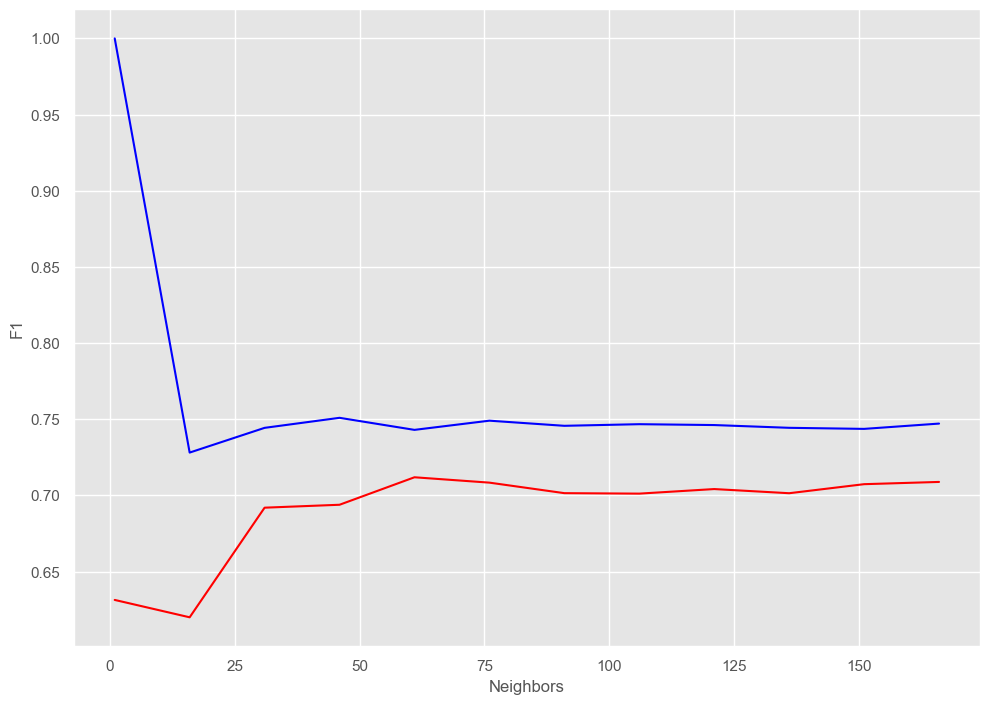

In [756]:
score_train=[]
score_test=[]
neighbors=range(1,180,15)
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    score_train.append( metrics.f1_score(y_train, y_pred_train))
    score_test.append( metrics.f1_score(y_test, y_pred_test))
plt.xlabel('Neighbors')
plt.ylabel('F1')
plt.plot (neighbors,score_train, color='blue', alpha=1.00)
plt.plot (neighbors,score_test, color='red', alpha=1.00)
plt.show()

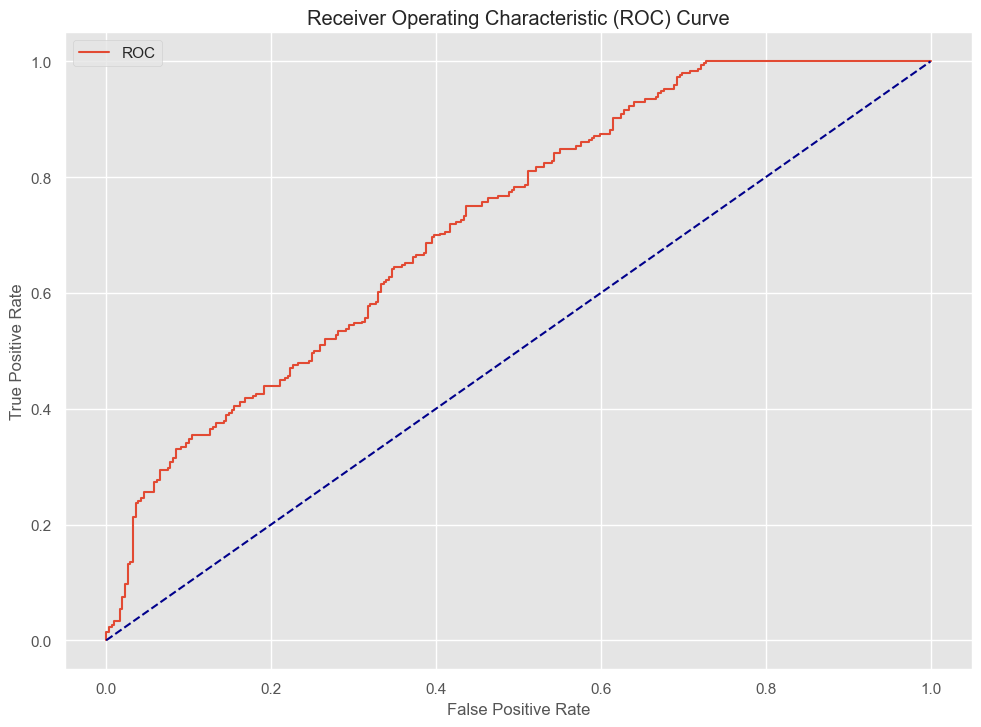

AUC: 0.72


In [757]:
model = KNeighborsClassifier(n_neighbors=18, weights = 'distance')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Naive Bayesian Classifier

In [758]:
from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_train = model.predict(X_train)

In [759]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)

from sklearn.metrics import f1_score
print('***RESULTS ON TEST SET***')
print("f1_score_test: ", f1_score(y_test, y_pred))
print('***RESULTS ON TRAIN SET***')
print("f1_score_test: ", f1_score(y_train, y_pred_train))

***RESULTS ON TEST SET***
f1_score_test:  0.6735294117647059
***RESULTS ON TRAIN SET***
f1_score_test:  0.7189781021897811


In [760]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       309
           1       0.60      0.77      0.67       296

    accuracy                           0.63       605
   macro avg       0.65      0.64      0.63       605
weighted avg       0.65      0.63      0.63       605



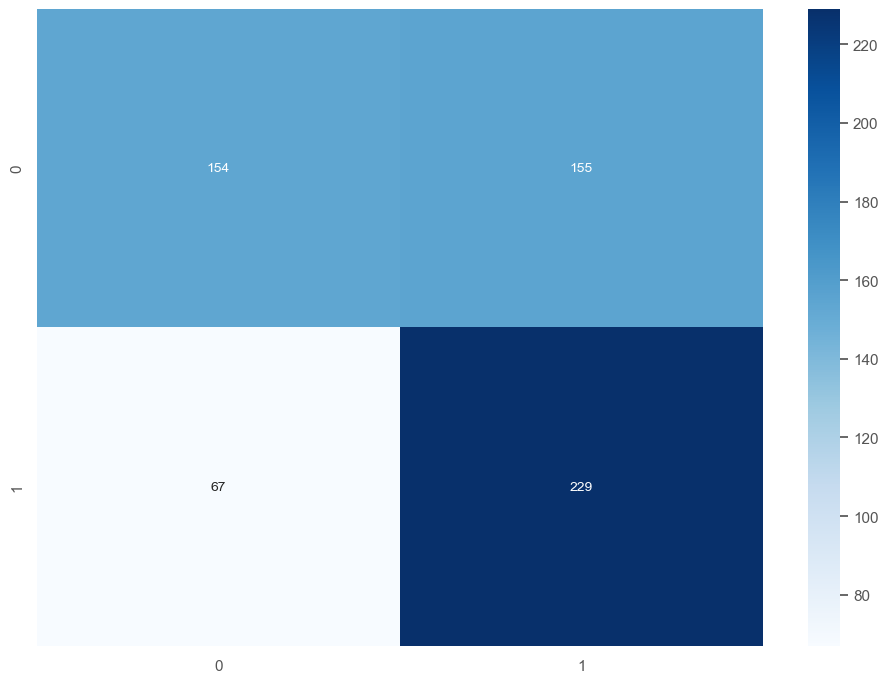

In [761]:
%matplotlib inline
import seaborn as sns

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues"); #annot=True to annotate cells fmt: format

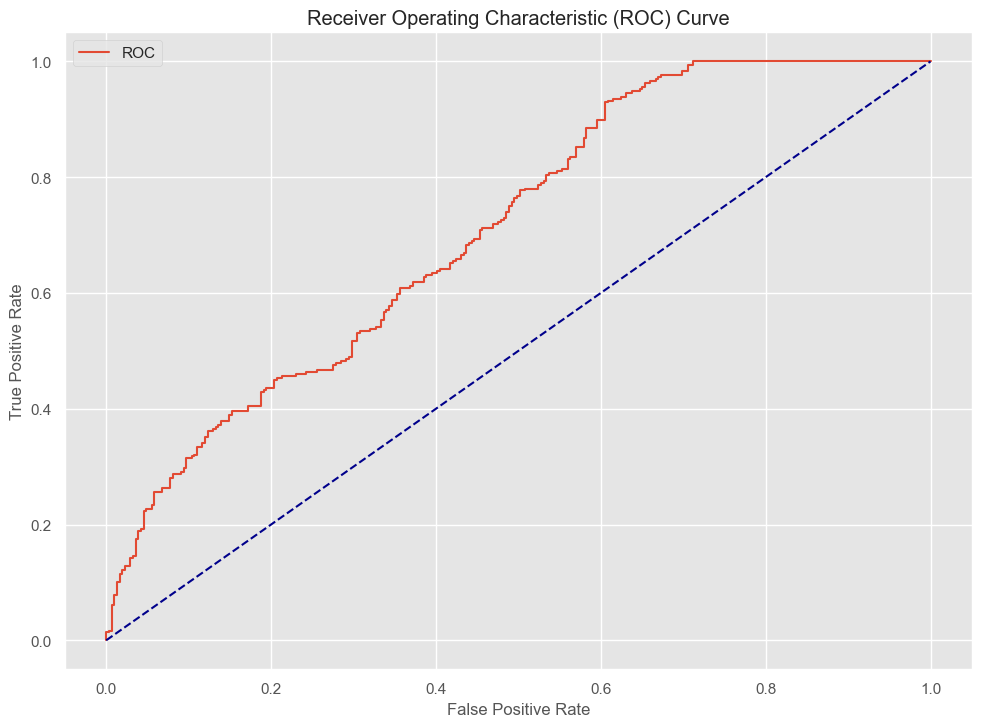

AUC: 0.71


In [762]:
from sklearn import metrics

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Classification Trees

In [763]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [764]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[213  96]
 [ 98 198]]


In [765]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], #Trying with different rules
              'max_depth': [3,5,10, 50], #...different depths
              'min_samples_split': [5,10],#...different minimum number of observations to split
              'min_samples_leaf': [2,4]}

In [766]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)

print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
***GRIDSEARCH RESULTS***
Best score: 0.736153 using {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.735461 (0.003320) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.735461 (0.003320) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.735461 (0.003320) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.735461 (0.003320) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.709046 (0.032875) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.712356 (0.032373) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.710665 (0.032538) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0

In [767]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)
y_pred

#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.7397260273972603
--
***RESULTS ON TEST SET***
f1_score:  0.7358778625954198
[[191 118]
 [ 55 241]]


In [768]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)

|--- weather <= -0.62
|   |--- month_8 <= 0.50
|   |   |--- weather <= -0.89
|   |   |   |--- perc_exp_comp <= -0.22
|   |   |   |   |--- weather <= -0.97
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- weather >  -0.97
|   |   |   |   |   |--- class: 1
|   |   |   |--- perc_exp_comp >  -0.22
|   |   |   |   |--- temperature <= -0.19
|   |   |   |   |   |--- perc_nat_rubber <= -0.18
|   |   |   |   |   |   |--- vulc <= -0.48
|   |   |   |   |   |   |   |--- perc_nat_rubber <= -0.32
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- perc_nat_rubber >  -0.32
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- vulc >  -0.48
|   |   |   |   |   |   |   |--- perc_nat_rubber <= -0.39
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- perc_nat_rubber >  -0.39
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- perc_nat_rubber >  -0.18
|   |   |   |   |   |   |--- month_1 <= 0.50
|   |   | 

## Logistic Regression

In [769]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression()
parameters = {"C":[1, 1e1,1e2, 10e3, 10e4],"penalty":['l2', '13'] , "max_iter":[50000,10000]} 

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv = 10, scoring = "f1", verbose = 4, n_jobs = -1, refit = True)
gs = gs.fit(X_train, y_train)

print('Gridsearch Results')
print('Best score %f using %s' %(gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Gridsearch Results
Best score 0.738342 using {'C': 1, 'max_iter': 50000, 'penalty': 'l2'}
0.738342 (0.043608) with: {'C': 1, 'max_iter': 50000, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'max_iter': 50000, 'penalty': '13'}
0.738342 (0.043608) with: {'C': 1, 'max_iter': 10000, 'penalty': 'l2'}
nan (nan) with: {'C': 1, 'max_iter': 10000, 'penalty': '13'}
0.737611 (0.044507) with: {'C': 10.0, 'max_iter': 50000, 'penalty': 'l2'}
nan (nan) with: {'C': 10.0, 'max_iter': 50000, 'penalty': '13'}
0.737611 (0.044507) with: {'C': 10.0, 'max_iter': 10000, 'penalty': 'l2'}
nan (nan) with: {'C': 10.0, 'max_iter': 10000, 'penalty': '13'}
0.736471 (0.044331) with: {'C': 100.0, 'max_iter': 50000, 'penalty': 'l2'}
nan (nan) with: {'C': 100.0, 'max_iter': 50000, 'penalty': '13'}
0.736471 (0.044331) with: {'C': 100.0, 'max_iter': 10000, 'penalty': 'l2'}
nan (nan) with: {'C': 100.0, 'max_iter': 10000, 'penalty': '13'}
0.734788 (0.044096) with: {

C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\edoar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 441, in _check_solver
    raise ValueError(
V

In [770]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)
print(gs.best_estimator_.coef_) #These tell us the contributions each gave to the score
print(X_train.columns)

[[ 0.32026048 -0.32002735  0.31997002  0.41552669 -0.01475857  0.13682303
   0.06286935  0.21274337  0.10610919  0.10497424 -1.32676287 -0.29152294
  -0.01860576  0.29286739 -0.36681683  0.12035786  0.20551258 -0.07654103
   0.11772054 -1.13248042 -1.02597847  1.60312343  1.1678225   0.26609918]]
Index(['tyre_quality_0', 'tyre_quality_1', 'month_0', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'tread_type_0', 'tread_type_1',
       'tread_type_2', 'tread_type_3', 'tread_type_4', 'vulc',
       'perc_nat_rubber', 'weather', 'temperature', 'perc_exp_comp'],
      dtype='object')


In [771]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics
from sklearn.metrics import classification_report

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.7547169811320755
--
***RESULTS ON TEST SET***
f1_score:  0.7121464226289519
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       309
           1       0.70      0.72      0.71       296

    accuracy                           0.71       605
   macro avg       0.71      0.71      0.71       605
weighted avg       0.71      0.71      0.71       605



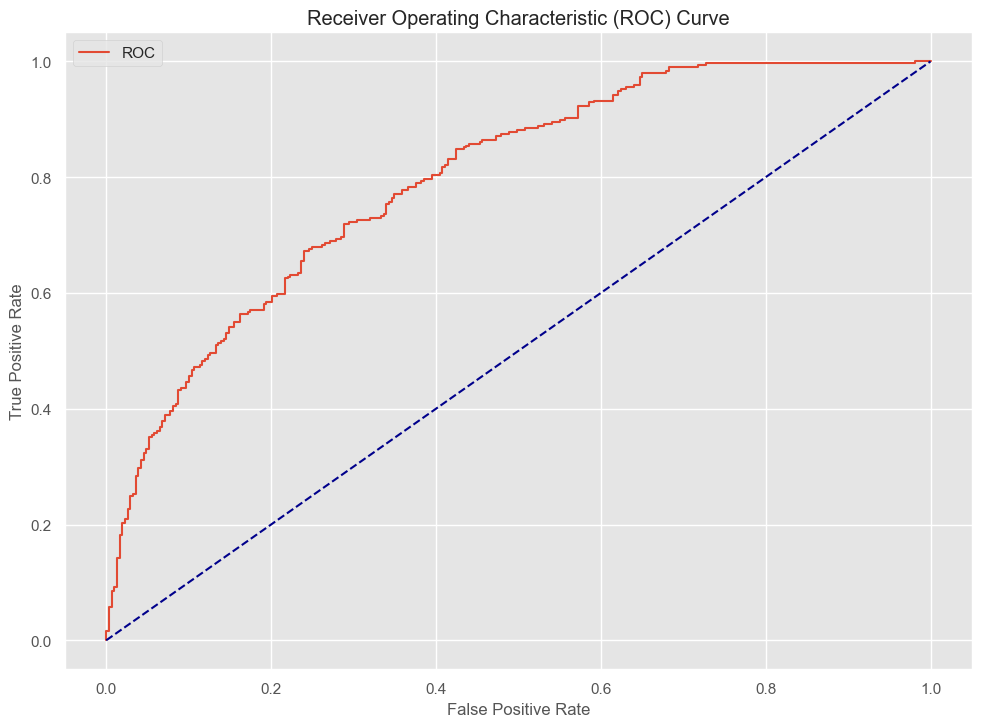

AUC: 0.80


In [772]:
model = LogisticRegression(C=100,solver='newton-cg')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Multi-layer Perceptron

In [781]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(random_state=69)
parameters = {"hidden_layer_sizes":[(4,6,4),(3,4,5)], "activation":["relu","tanh"], "max_iter": [1000, 5000], "alpha": [0.001, 0.01, 0.1, 1]}
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'f1', verbose=4, n_jobs=-1, refit=True)
gs = gs.fit(X_train, y_train)

print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Fitting 10 folds for each of 32 candidates, totalling 320 fits
***GRIDSEARCH RESULTS***
Best score: 0.739538 using {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (3, 4, 5), 'max_iter': 5000}
0.732069 (0.033257) with: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (4, 6, 4), 'max_iter': 1000}
0.727488 (0.047034) with: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (4, 6, 4), 'max_iter': 5000}
0.724052 (0.043959) with: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (3, 4, 5), 'max_iter': 1000}
0.727000 (0.039542) with: {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (3, 4, 5), 'max_iter': 5000}
0.707652 (0.050409) with: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (4, 6, 4), 'max_iter': 1000}
0.718905 (0.030433) with: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (4, 6, 4), 'max_iter': 5000}
0.723211 (0.045771) with: {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (3, 4, 5), 'max_i

<AxesSubplot:>

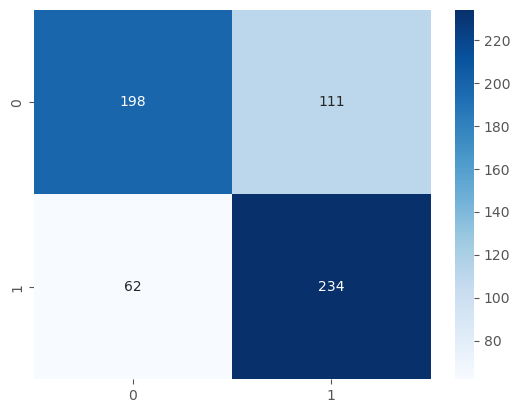

In [227]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")

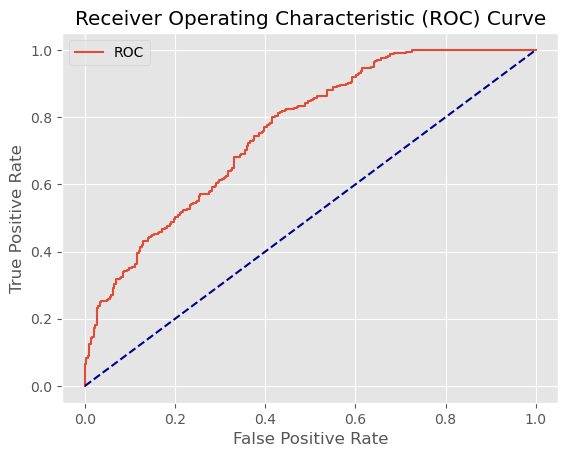

AUC: 0.76


In [282]:
model=MLPClassifier(hidden_layer_sizes=(3,10,25), alpha=0.01, max_iter=5000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Ensemble Methods

### Random Forest

In [791]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

classifier= RandomForestClassifier()
parameters = {'n_estimators' : [50, 100, 200, 500,1000], #NUMBER OF WEAK MODELS (TREES) WE WANT TO CONSTRUCT
    'criterion' : ['entropy', 'gini'],
             'max_depth' : [1,2,3,4], #if balnk, the trees expand until it reaches pure nodes
             'min_samples_split' : [4,5,10],
              'min_samples_leaf' : [4,5,10]
             }

gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1, refit=True) #CV = CROSS  VALIDATING THREE GROUPS

gs.fit(X_train,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [4, 5, 10],
                         'min_samples_split': [4, 5, 10],
                         'n_estimators': [50, 100, 200, 500, 1000]},
             scoring='f1', verbose=10)

In [792]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.755942 using {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.730054 (0.011480) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 50}
0.722738 (0.004075) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
0.731561 (0.004015) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 200}
0.732058 (0.003589) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 500}
0.729475 (0.005284) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 1000}
0.732683 (0.011511) with: {'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
0.732294 (0.004294) with: {'cri

In [795]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

In [796]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

print(classification_report(y_test, y_pred))

rand_forest = RandomForestClassifier(n_estimators=500, criterion='gini', max_depth=4, min_samples_split=5, min_samples_leaf=10)
rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.56      0.66       309
           1       0.65      0.87      0.75       296

    accuracy                           0.71       605
   macro avg       0.74      0.71      0.70       605
weighted avg       0.74      0.71      0.70       605



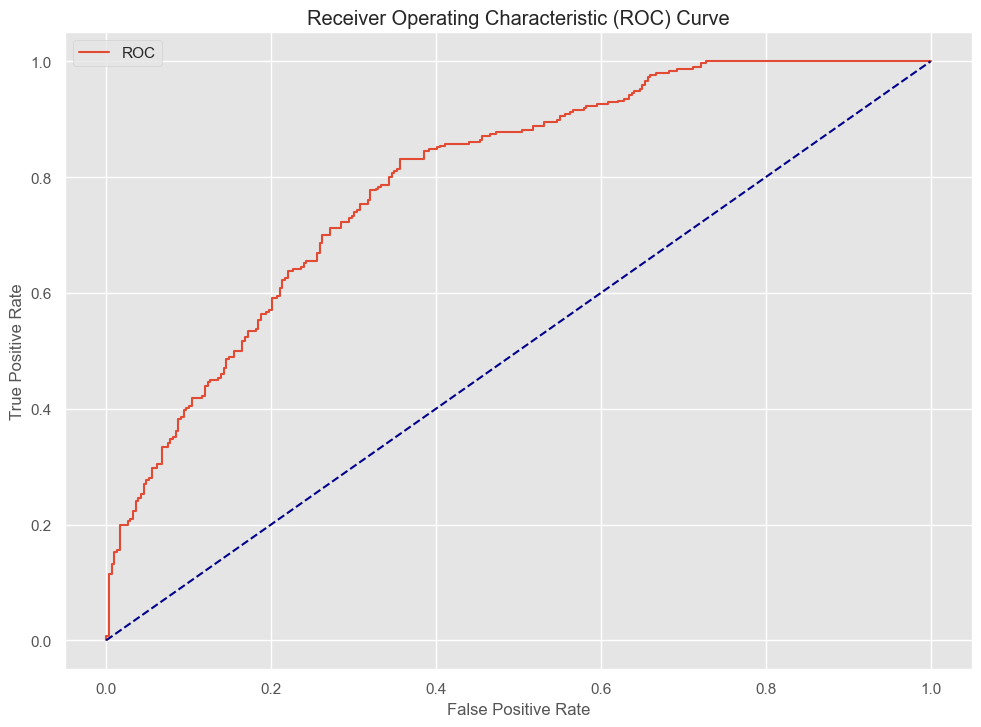

AUC: 0.79


In [786]:
# ROC curve

from sklearn import metrics

y_probs = rand_forest.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Ada-Boost 

#### Classification Trees

In [797]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

classifier= AdaBoostClassifier() 
parameters = {'n_estimators' : [1000, 2000],
    'learning_rate' : [0.0001, 0.01, 0.1, 1, 10]}

gs = GridSearchCV(classifier, parameters, cv=10, scoring = 'f1', verbose=10, n_jobs=-1, refit=True)

gs.fit(X_train,y_train)

#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Fitting 10 folds for each of 10 candidates, totalling 100 fits
***GRIDSEARCH RESULTS***
Best score: 0.738451 using {'learning_rate': 0.0001, 'n_estimators': 1000}
0.738451 (0.026252) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.738451 (0.026252) with: {'learning_rate': 0.0001, 'n_estimators': 2000}
0.731768 (0.032274) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.733954 (0.031784) with: {'learning_rate': 0.01, 'n_estimators': 2000}
0.717132 (0.036135) with: {'learning_rate': 0.1, 'n_estimators': 1000}
0.709306 (0.039938) with: {'learning_rate': 0.1, 'n_estimators': 2000}
0.696284 (0.044303) with: {'learning_rate': 1, 'n_estimators': 1000}
0.685178 (0.044371) with: {'learning_rate': 1, 'n_estimators': 2000}
0.191587 (0.039949) with: {'learning_rate': 10, 'n_estimators': 1000}
0.191587 (0.039949) with: {'learning_rate': 10, 'n_estimators': 2000}


In [798]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)
print("f1_score_train: ", metrics.f1_score(y_train, y_pred_train))
print("f1_score_test: ", metrics.f1_score(y_test, y_pred))

f1_score_train:  0.7383467992541951
f1_score_test:  0.7358778625954198
